In [48]:
#!pip install jupyter_dashboards 

In [49]:
from pybaseball import statcast_pitcher, pitching_leaders
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.metrics.pairwise import pairwise_distances

In [50]:
# from pybaseball import pitching_stats
# data = pitching_stats(2019)
# data.head()

In [51]:
# data = pitching_leaders.pitching_stats(start_season=2019, qual=25)
# pd.set_option('display.max_columns', 500)
# data.head(20)

In [52]:
# cols = list(pd.read_csv("rec_pitchers_1", nrows =1))
# print(cols)

In [53]:
#pitchers = pd.read_csv("rec_pitchers_1", usecols =[i for i in cols if i != 'Unnamed: 0'])

In [54]:
pitchers = pd.read_csv('/Users/orah82/baseball_rec_sys',index_col="Player/Team")

In [55]:
pitchers.shape

(615, 4)

In [56]:
data = pitchers

In [57]:
data.head()

,Age,FIP,Dollars,F-Strike%
Player/Team,,,,
Max Scherzer(Nationals),34.0,2.12,27.1,0.703
Matthew Boyd(Tigers),28.0,2.75,21.7,0.632
Lucas Giolito(White Sox),24.0,2.62,20.4,0.617
Stephen Strasburg(Nationals),30.0,2.68,20.7,0.655
Hyun-Jin Ryu(Dodgers),32.0,2.52,19.3,0.648


In [58]:
# data["Player/Team"] = data["Name"].map(str) + data["Team"]

In [59]:
data.head(20)

,Age,FIP,Dollars,F-Strike%
Player/Team,,,,
Max Scherzer(Nationals),34.0,2.12,27.1,0.703
Matthew Boyd(Tigers),28.0,2.75,21.7,0.632
Lucas Giolito(White Sox),24.0,2.62,20.4,0.617
Stephen Strasburg(Nationals),30.0,2.68,20.7,0.655
Hyun-Jin Ryu(Dodgers),32.0,2.52,19.3,0.648
Lance Lynn(Rangers),32.0,3.17,18.3,0.591
German Marquez(Rockies),24.0,3.27,18.0,0.680
Jake Odorizzi(Twins),29.0,2.80,17.0,0.568
Mike Minor(Rangers),31.0,3.43,16.4,0.631


In [60]:
# data.head()

# features = ['Player/Team', 'Age','FIP','Dollars','F-Strike%']

# data = data[features]

In [61]:
# data = data.set_index('Player/Team')

In [62]:
# data.info()

# data['Dollars'] = data.Dollars.str.replace("$","")

# data['Dollars']= pd.to_numeric(data.Dollars, errors='coerce')

# data.info()

In [63]:
import sys

In [64]:
sys.getsizeof(data)

67861

In [65]:
sparse = sparse.csr_matrix(data.fillna(0))

In [66]:
sparse.shape

(615, 4)

In [67]:
sys.getsizeof(sparse)

56

In [68]:
type(sparse)

scipy.sparse.csr.csr_matrix

In [69]:
print(sparse[:5, :])

  (0, 0)	34.0
  (0, 1)	2.12
  (0, 2)	27.1
  (0, 3)	0.703
  (1, 0)	28.0
  (1, 1)	2.75
  (1, 2)	21.7
  (1, 3)	0.632
  (2, 0)	24.0
  (2, 1)	2.62
  (2, 2)	20.4
  (2, 3)	0.617
  (3, 0)	30.0
  (3, 1)	2.68
  (3, 2)	20.7
  (3, 3)	0.655
  (4, 0)	32.0
  (4, 1)	2.52
  (4, 2)	19.3
  (4, 3)	0.648


In [70]:
#np.all(np.isfinite(sparse))

In [71]:
sparse.shape

(615, 4)

In [72]:
recommender = pairwise_distances(sparse, metric='cosine')

In [73]:
data.index[:5]

Index(['Max Scherzer(Nationals)', 'Matthew Boyd(Tigers)',
       'Lucas Giolito(White Sox)', 'Stephen Strasburg(Nationals)',
       'Hyun-Jin Ryu(Dodgers)'],
      dtype='object', name='Player/Team')

In [74]:
recommender_df = pd.DataFrame(recommender, 
                              index=data.index,
                              columns=data.index)

In [75]:
recommender_df.head()

Player/Team,Max Scherzer(Nationals),Matthew Boyd(Tigers),Lucas Giolito(White Sox),Stephen Strasburg(Nationals),Hyun-Jin Ryu(Dodgers),Lance Lynn(Rangers),German Marquez(Rockies),Jake Odorizzi(Twins),Mike Minor(Rangers),Frankie Montas(Athletics),...,Zac Reininger(Tigers),Matt Koch(Diamondbacks),Anthony Swarzak(- - -),Drew Pomeranz(Giants),Drew Steckenrider(Marlins),Alex Cobb(Orioles),Derek Holland(Giants),Dan Straily(Orioles),Adam Warren(Padres),Richard Rodriguez(Pirates)
Player/Team,,,,,,,,,,,,,,,,,,,,,
Max Scherzer(Nationals),0.000000,0.000507,0.001088,0.002673,0.008610,0.012379,0.002240,0.010710,0.018394,0.008670,...,0.240255,0.239051,0.225092,0.226086,0.234882,0.252771,0.225102,0.233575,0.228910,0.233938
Matthew Boyd(Tigers),0.000507,0.000000,0.001030,0.001529,0.006803,0.009728,0.000618,0.008281,0.014957,0.006183,...,0.224972,0.223937,0.212468,0.213223,0.220381,0.236022,0.212467,0.219288,0.215451,0.219586
Lucas Giolito(White Sox),0.001088,0.001030,0.000000,0.005062,0.013104,0.016949,0.002173,0.015042,0.023550,0.012047,...,0.250699,0.249759,0.239487,0.240136,0.246527,0.260894,0.239474,0.245546,0.242100,0.245806
Stephen Strasburg(Nationals),0.002673,0.001529,0.005062,0.000000,0.001885,0.003623,0.001403,0.002750,0.007118,0.001719,...,0.194897,0.193772,0.181150,0.182000,0.189900,0.206813,0.181153,0.188703,0.184481,0.189032
Hyun-Jin Ryu(Dodgers),0.008610,0.006803,0.013104,0.001885,0.000000,0.000439,0.005895,0.000202,0.002017,0.000374,...,0.164770,0.163538,0.149561,0.150528,0.159300,0.177671,0.149571,0.157979,0.153309,0.158346


In [76]:
pd.set_option('display.max_colwidth', 999)

In [77]:
data.head(20)

,Age,FIP,Dollars,F-Strike%
Player/Team,,,,
Max Scherzer(Nationals),34.0,2.12,27.1,0.703
Matthew Boyd(Tigers),28.0,2.75,21.7,0.632
Lucas Giolito(White Sox),24.0,2.62,20.4,0.617
Stephen Strasburg(Nationals),30.0,2.68,20.7,0.655
Hyun-Jin Ryu(Dodgers),32.0,2.52,19.3,0.648
Lance Lynn(Rangers),32.0,3.17,18.3,0.591
German Marquez(Rockies),24.0,3.27,18.0,0.680
Jake Odorizzi(Twins),29.0,2.80,17.0,0.568
Mike Minor(Rangers),31.0,3.43,16.4,0.631


In [78]:
player=player
pitchers[pitchers['Player/Team'].str.contains(player)]['Player/Team']

NameError: name 'player' is not defined

In [ ]:
recommender_df[player].sort_values()[1:11]

In [ ]:
from ipywidgets import widgets, Box
from IPython.display import display,HTML,Image
from IPython.core.display import HTML 

In [ ]:
layout = widgets.Layout(border='1px solid red', width='500px', height='300px')

In [ ]:
layout.width='800px'
layout.height='150px'

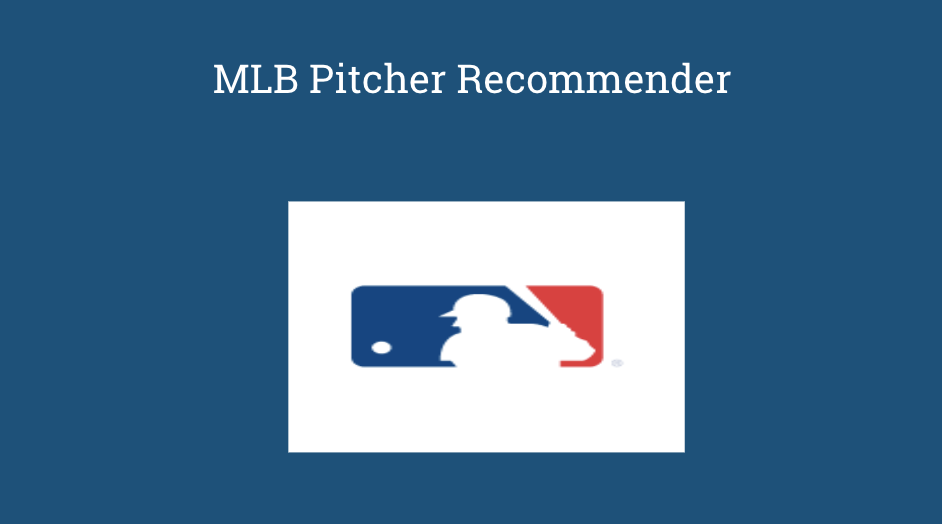

In [79]:
PATH = "/Users/orah82/Desktop/"
Image(filename = PATH + "mlb_logo.png", width=800, height=800)

In [80]:
inputText = widgets.Text(
    placeholder= "Enter Player/Team",
    disabled=False,
    layout=layout)

def makeUpperCase(sender):    
    outputText.value = str(recommender_df[inputText.value].sort_values()[1:11])
    
inputText.on_submit(makeUpperCase)
inputText


Text(value='', layout=Layout(border='1px solid red', height='150px', width='800px'), placeholder='Enter Player…

In [81]:
outputText = widgets.Textarea(
    placeholder= "Best Player",
    disabled=False,
    layout=layout)
outputText

Textarea(value='', layout=Layout(border='1px solid red', height='150px', width='800px'), placeholder='Best Pla…

In [82]:
# from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider

# form_item_layout = Layout(
#     display='flex',
#     flex_flow='row',
#     justify_content='space-between'
# )

# form_items = [
#     Box([Label(value='Age of the captain'), IntSlider(min=40, max=60)], layout=form_item_layout),
#     Box([Label(value='Egg style'),
#          Dropdown(options=['Scrambled', 'Sunny side up', 'Over easy'])], layout=form_item_layout),
#     Box([Label(value='Ship size'),
#          FloatText()], layout=form_item_layout),
#     Box([Label(value='Information'),
#          Textarea()], layout=form_item_layout)
# ]

# form = Box(form_items, layout=Layout(
#     display='flex',
#     flex_flow='column',
#     border='solid 2px',
#     align_items='stretch',
#     width='50%'
# ))
# form

In [83]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script><a href="javascript:code_toggle()">Toggle</a> code.''')